In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')


def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.02, 0.3))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 12*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gpt3_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '205 thousand',
 5: '503 thousand',
 10: '819 thousand',
 20: '1 million',
 30: '2 million',
 40: '3 million',
 50: '4 million',
 60: '6 million',
 70: '9 million',
 80: '13 million',
 90: '23 million',
 95: '37 million',
 99: '86 million'}
-
Actual spend ($12.0M) is at the 78.2th percentile of the model


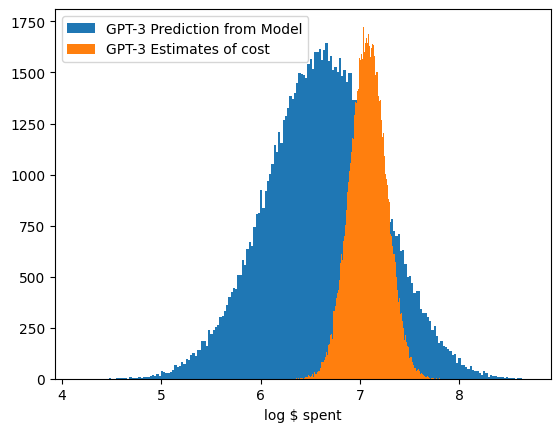

In [3]:
plt.hist(samples, bins=200, label='GPT-3 Prediction from Model')
estimate_cost_samples = sq.dist_fn(sq.lognorm(actual_gpt3_spend/2, actual_gpt3_spend*2), fn=np.log10) @ (100*K)
plt.hist(estimate_cost_samples, bins=200, label='GPT-3 Estimates of cost')
plt.xlabel('log $ spent')
plt.legend()
plt.show()

## GPT4 Prediction (for calibration)

In [4]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=10*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                       percent_compute_on_biggest_model=pct_dist(0.02, 0.3))
samples = gpt4_prediction @ (100*K)

# See: https://epochai.org/trends
actual_gpt4_spend = 53.8*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gpt4_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gpt4_spend) for s in samples]) * 100, 1)))


{1: '2 million',
 5: '5 million',
 10: '8 million',
 20: '14 million',
 30: '22 million',
 40: '31 million',
 50: '43 million',
 60: '60 million',
 70: '85 million',
 80: '130 million',
 90: '230 million',
 95: '366 million',
 99: '862 million'}
-
Actual spend ($53.8M) is at the 56.6th percentile of the model


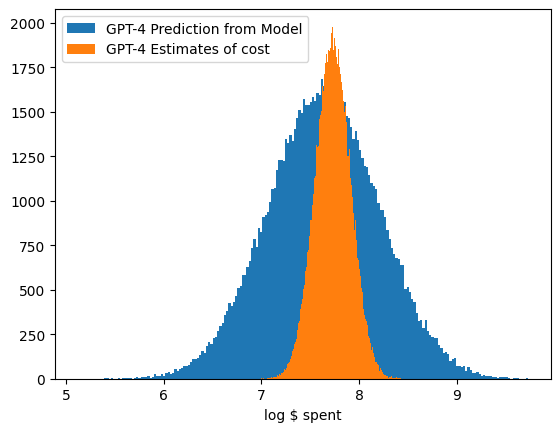

In [5]:
plt.hist(samples, bins=200, label='GPT-4 Prediction from Model')
estimate_cost_samples = sq.dist_fn(sq.lognorm(actual_gpt4_spend/2, actual_gpt4_spend*2), fn=np.log10) @ (100*K)
plt.hist(estimate_cost_samples, bins=200, label='GPT-4 Estimates of cost')
plt.xlabel('log $ spent')
plt.legend()
plt.show()

## Gemini Ultra Prediction (for calibration)

In [6]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 40*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.1, 0.7),
                                                             percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                             percent_compute_on_biggest_model=pct_dist(0.01, 0.1))
samples = gemini_prediction @ (100*K)

# See: https://epochai.org/trends
actual_gemini_spend = 57*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend (${}M) is at the {}th percentile of the model'.format(round(actual_gemini_spend / M, 1),
                                                                          round(np.mean([s <= np.log10(actual_gemini_spend) for s in samples]) * 100, 1)))


{1: '6 million',
 5: '15 million',
 10: '23 million',
 20: '40 million',
 30: '59 million',
 40: '83 million',
 50: '114 million',
 60: '156 million',
 70: '218 million',
 80: '320 million',
 90: '543 million',
 95: '839 million',
 99: '2 billion'}
-
Actual spend ($57.0M) is at the 28.9th percentile of the model


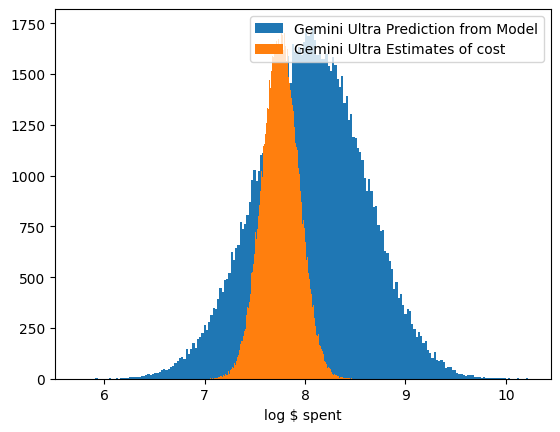

In [7]:
plt.hist(samples, bins=200, label='Gemini Ultra Prediction from Model')
estimate_cost_samples = sq.dist_fn(sq.lognorm(actual_gemini_spend/2, actual_gemini_spend*2), fn=np.log10) @ (100*K)
plt.hist(estimate_cost_samples, bins=200, label='Gemini Ultra Estimates of cost')
plt.xlabel('log $ spent')
plt.legend()
plt.show()

## Model for Largest Training Run in 2024

In [8]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 30*B, credibility=80),
                                                                       total_revenue=sq.lognorm(1*B, 5*B, credibility=80),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.4),
                                                                       percent_profit_spent_this_year=pct_dist(0.3, 1),
                                                                       percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.01, 0.7))
samples = largest_openai_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '1 million',
 5: '5 million',
 10: '9 million',
 20: '20 million',
 30: '36 million',
 40: '60 million',
 50: '95 million',
 60: '152 million',
 70: '250 million',
 80: '436 million',
 90: '867 million',
 95: '1 billion',
 99: '3 billion'}


In [9]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(5*B, 10*B, credibility=80),
                                                                          total_revenue=sq.lognorm(1*B, 2*B, credibility=80),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.4),
                                                                          percent_profit_spent_this_year=pct_dist(0.3, 1),
                                                                          percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                          percent_compute_on_biggest_model=pct_dist(0.01, 0.7))
samples = largest_anthropic_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '605 thousand',
 5: '2 million',
 10: '4 million',
 20: '9 million',
 30: '15 million',
 40: '25 million',
 50: '40 million',
 60: '64 million',
 70: '103 million',
 80: '180 million',
 90: '356 million',
 95: '582 million',
 99: '1 billion'}


In [10]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                           percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                           percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_google_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '16 million',
 10: '29 million',
 20: '59 million',
 30: '99 million',
 40: '154 million',
 50: '231 million',
 60: '346 million',
 70: '535 million',
 80: '886 million',
 90: '2 billion',
 95: '3 billion',
 99: '8 billion'}


In [11]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                              percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                              percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_microsoft_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '5 million',
 5: '16 million',
 10: '29 million',
 20: '59 million',
 30: '99 million',
 40: '154 million',
 50: '232 million',
 60: '349 million',
 70: '538 million',
 80: '890 million',
 90: '2 billion',
 95: '3 billion',
 99: '8 billion'}


In [12]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.1, 0.8),
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.01, 0.3))
samples = largest_fb_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '16 million',
 10: '29 million',
 20: '60 million',
 30: '100 million',
 40: '156 million',
 50: '233 million',
 60: '351 million',
 70: '538 million',
 80: '895 million',
 90: '2 billion',
 95: '3 billion',
 99: '8 billion'}


In [13]:
largest_inflection_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 2*B, credibility=80),
                                                                           total_revenue=sq.lognorm(10*M, 200*M, credibility=80),
                                                                           percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                           percent_revenue_that_is_profit=pct_dist(0.05, 0.4),
                                                                           percent_profit_spent_this_year=pct_dist(0.3, 1),
                                                                           percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                           percent_compute_on_biggest_model=pct_dist(0.01, 0.7))
samples = largest_inflection_model_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '100 thousand',
 5: '338 thousand',
 10: '665 thousand',
 20: '1 million',
 30: '3 million',
 40: '4 million',
 50: '7 million',
 60: '11 million',
 70: '18 million',
 80: '32 million',
 90: '65 million',
 95: '107 million',
 99: '242 million'}


In [14]:
us_gov_prediction = sq.mixture([[0.6, sq.norm(4, 6, credibility=80)],
                                [0.3, sq.norm(6, 8, credibility=80)],
                                [0.1, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(1*B, 10*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.1, 0.5))]])
samples = us_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: '2 thousand',
 5: '8 thousand',
 10: '18 thousand',
 20: '46 thousand',
 30: '99 thousand',
 40: '210 thousand',
 50: '494 thousand',
 60: '1 million',
 70: '5 million',
 80: '22 million',
 90: '133 million',
 95: '388 million',
 99: '1 billion'}


In [15]:
uk_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                               percent_r_and_d_on_ai=1,
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '32 million',
 5: '100 million',
 10: '100 million',
 20: '100 million',
 30: '100 million',
 40: '131 million',
 50: '207 million',
 60: '333 million',
 70: '563 million',
 80: '1 billion',
 90: '3 billion',
 95: '5 billion',
 99: '19 billion'}


In [16]:
china_gov_prediction = sq.mixture([[0.05, 0],
                                   [0.55, sq.norm(6, 8, lclip=6)],
                                   [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                  percent_r_and_d_on_ai=1,
                                                                                  percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])

# Adjust China's "effective US-equivalent" spend by export controls and other things
# china_gov_prediction = sq.dist_max(0, china_gov_prediction - sq.norm(0.1, 0.5, lclip=0.05, rclip=1))

samples = china_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: 1.0,
 5: '1 million',
 10: '2 million',
 20: '4 million',
 30: '8 million',
 40: '16 million',
 50: '32 million',
 60: '85 million',
 70: '276 million',
 80: '786 million',
 90: '2 billion',
 95: '5 billion',
 99: '18 billion'}


In [17]:
uae_gov_prediction = sq.mixture([[0.6, sq.norm(7, 9, lclip=8)],
                                 [0.4, bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, 100*B, credibility=80),
                                                                                percent_r_and_d_on_ai=1,
                                                                                percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                percent_compute_on_biggest_model=pct_dist(0.01, 0.3))]])
samples = uk_gov_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '34 million',
 5: '100 million',
 10: '100 million',
 20: '100 million',
 30: '100 million',
 40: '132 million',
 50: '206 million',
 60: '333 million',
 70: '564 million',
 80: '1 billion',
 90: '3 billion',
 95: '5 billion',
 99: '19 billion'}


In [18]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_inflection_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(us_gov_prediction) >>
               sq.dist_max(uk_gov_prediction) >>
               sq.dist_max(uae_gov_prediction) >>
               sq.dist_max(china_gov_prediction))
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '215 million',
 5: '395 million',
 10: '553 million',
 20: '843 million',
 30: '1 billion',
 40: '2 billion',
 50: '2 billion',
 60: '3 billion',
 70: '4 billion',
 80: '5 billion',
 90: '9 billion',
 95: '14 billion',
 99: '34 billion'}


In [19]:
from collections import Counter

models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Inflection', largest_inflection_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['USGov', us_gov_prediction],
          ['UKGov', uk_gov_prediction],
          ['UAEGov', uae_gov_prediction],
          ['ChinaGov', china_gov_prediction]]

labels = [m[0] for m in models]
max_indices = np.argmax([m[1] @ 100_000 for m in models], axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
label_percentages

{'Google': '14.4%',
 'UKGov': '17.0%',
 'Meta': '14.2%',
 'Microsoft': '14.2%',
 'ChinaGov': '13.8%',
 'USGov': '1.4%',
 'OpenAI': '6.3%',
 'UAEGov': '17.0%',
 'Anthropic': '1.7%',
 'Inflection': '0.1%'}

## Cache spend model

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 2471417.25it/s]


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.3,
 5: 8.6,
 10: 8.7,
 20: 8.9,
 30: 9.1,
 40: 9.2,
 50: 9.3,
 60: 9.4,
 70: 9.6,
 80: 9.7,
 90: 10.0,
 95: 10.2,
 99: 10.5}


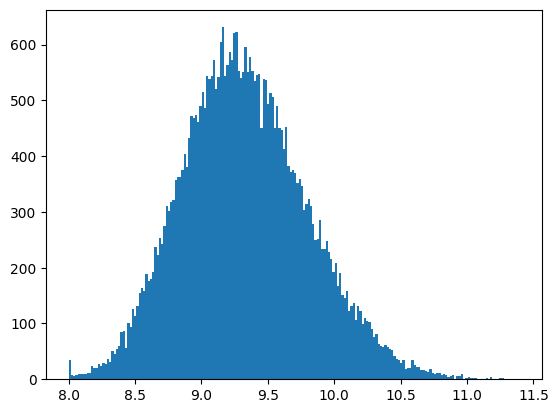

In [20]:
# Output expected willingness to pay for a model in 2024, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

In [21]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-12-27 16:39:31.628556
